In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install mlxtend
!pip install pyfpgrowth

In [2]:
# Load the data from the upload file 

data=pd.read_csv(r"C:\Users\newaco\0.3 Complete Python Playlist\EDA& BA.csv")

#Display the first few rows if the data to understand its structure 
data.head()


,Item ID (Product Code),Timestamp,Bill Time,Transaction ID
0,BEER,30-11-23,10:33,CC13880
1,BEER,24-11-23,12:07,CC15338
2,BEER,30-11-23,15:39,CC16800
3,BEER,26-11-23,11:08,CC21297
4,BEER,30-11-23,14:58,CC21652


In [3]:
# Combine the "Timestamp" and "Bill Time" columns into a new column named "timestamp"
data['timestamp'] = data['Timestamp'] + ' ' + data['Bill Time']
# Dropping the original "Timestamp" and "Bill Time" columns
data.drop(['Timestamp', 'Bill Time'], axis=1, inplace=True)

# Display the updated dataset with the new "timestamp" column
data.head()

,Item ID (Product Code),Transaction ID,timestamp
0,BEER,CC13880,30-11-23 10:33
1,BEER,CC15338,24-11-23 12:07
2,BEER,CC16800,30-11-23 15:39
3,BEER,CC21297,26-11-23 11:08
4,BEER,CC21652,30-11-23 14:58


In [4]:
# Change the column name "Item ID (Product Code)" to "item id"
data.rename(columns={'Item ID (Product Code)': 'item id'}, inplace=True)

# Perform initial exploratory data analysis (EDA)
data_info = data.describe(include='all')
data_stats = data.describe()

data_info, data_stats

(            item id Transaction ID       timestamp
 count        797915         797915          797915
 unique          147         131715           24639
 top     NATURAL CUT        CC41615  30-11-23 19:20
 freq          58924            113             182,
             item id Transaction ID       timestamp
 count        797915         797915          797915
 unique          147         131715           24639
 top     NATURAL CUT        CC41615  30-11-23 19:20
 freq          58924            113             182)

The initial exploratory data analysis (EDA) results are as follows:

The dataset consists of 797,915 records.
There are 147 unique items in the "item id" column.
The most frequent item is "NATURAL CUT", which appears 58,924 times.
There are 131,715 unique transaction IDs.
The most frequent transaction ID is "CC41615", which occurs 113 times.
There are 24,639 unique timestamps.
The most common timestamp is "30-11-23 19:20", appearing 182 times.

C:\Users\newaco\AppData\Local\Temp\ipykernel_7072\2749269960.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['timestamp'] = pd.to_datetime(data['timestamp'])
C:\Users\newaco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\newaco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


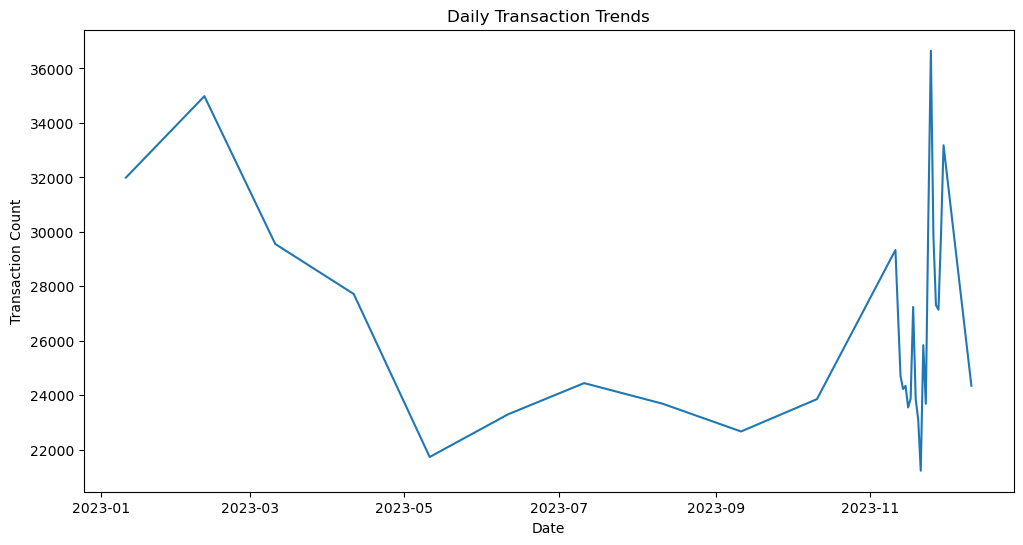

C:\Users\newaco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\newaco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


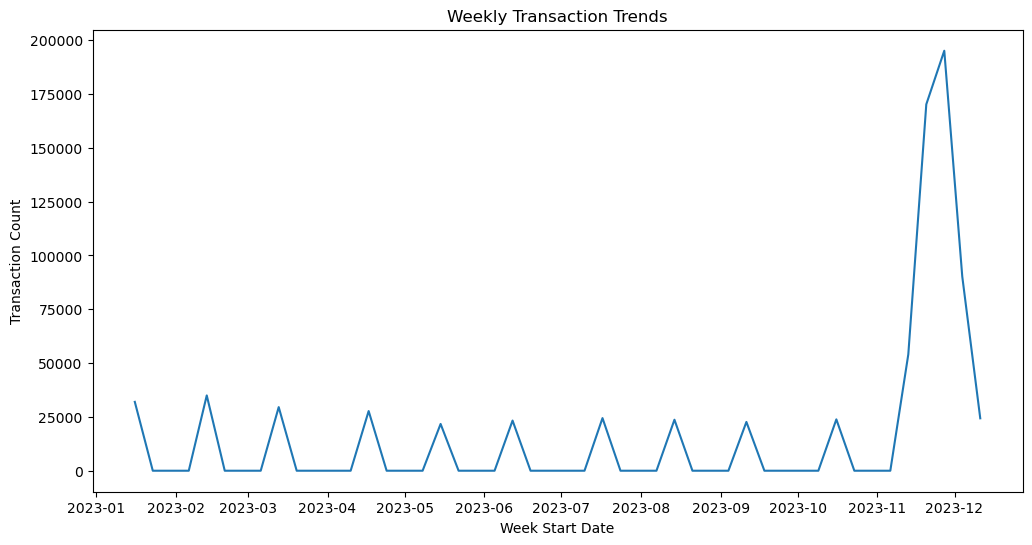

C:\Users\newaco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\newaco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


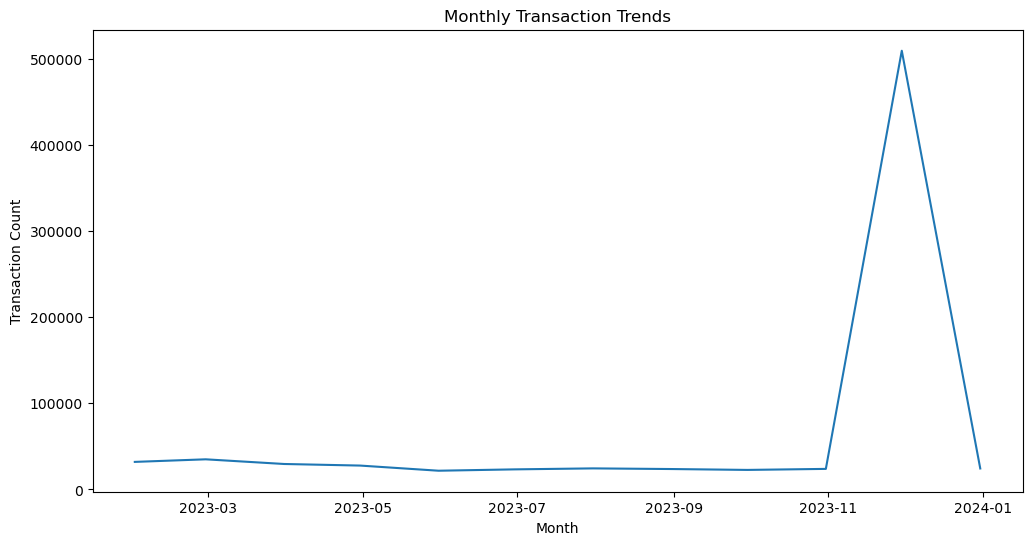

In [5]:
import seaborn as sns

# Load your data
# Assuming your dataframe is named 'df' and timestamp column is 'timestamp'
# If your timestamp is in a string format, you may need to convert it to datetime first
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract date and time components
data['date'] = data['timestamp'].dt.date
data['time'] = data['timestamp'].dt.time

# Daily Transaction Trends
daily_transactions = data.groupby('date').size().reset_index(name='transaction_count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='transaction_count', data=daily_transactions)
plt.title('Daily Transaction Trends')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

# Weekly Transaction Trends
weekly_transactions = data.resample('W-Mon', on='timestamp').size().reset_index(name='transaction_count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='transaction_count', data=weekly_transactions)
plt.title('Weekly Transaction Trends')
plt.xlabel('Week Start Date')
plt.ylabel('Transaction Count')
plt.show()

# Monthly Transaction Trends
monthly_transactions = data.resample('M', on='timestamp').size().reset_index(name='transaction_count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='transaction_count', data=monthly_transactions)
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()


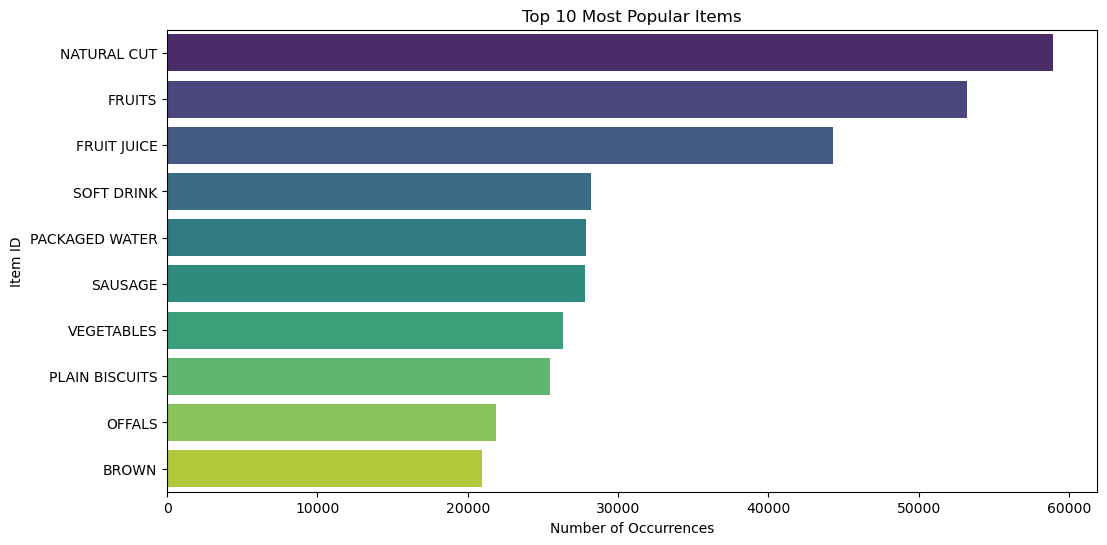

C:\Users\newaco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


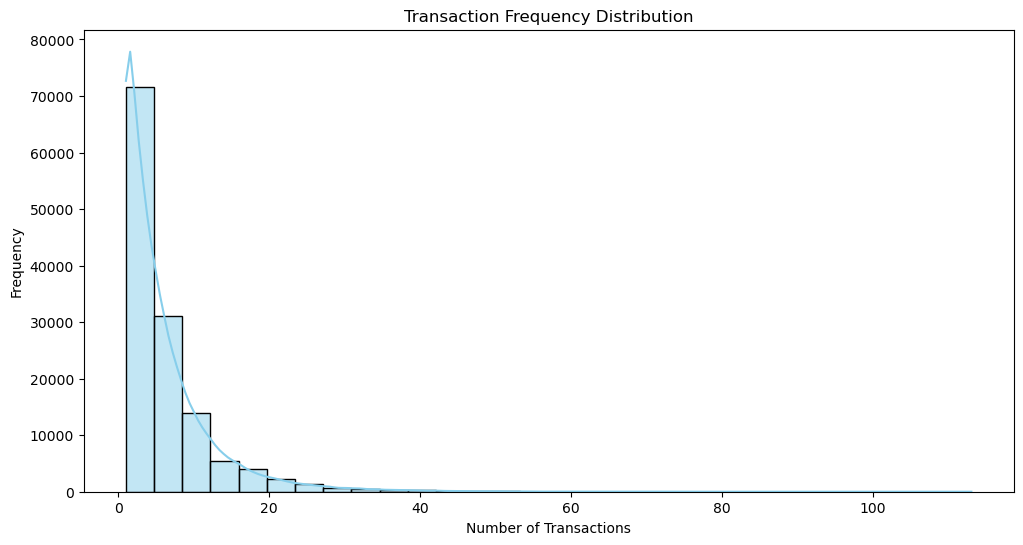

C:\Users\newaco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\newaco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


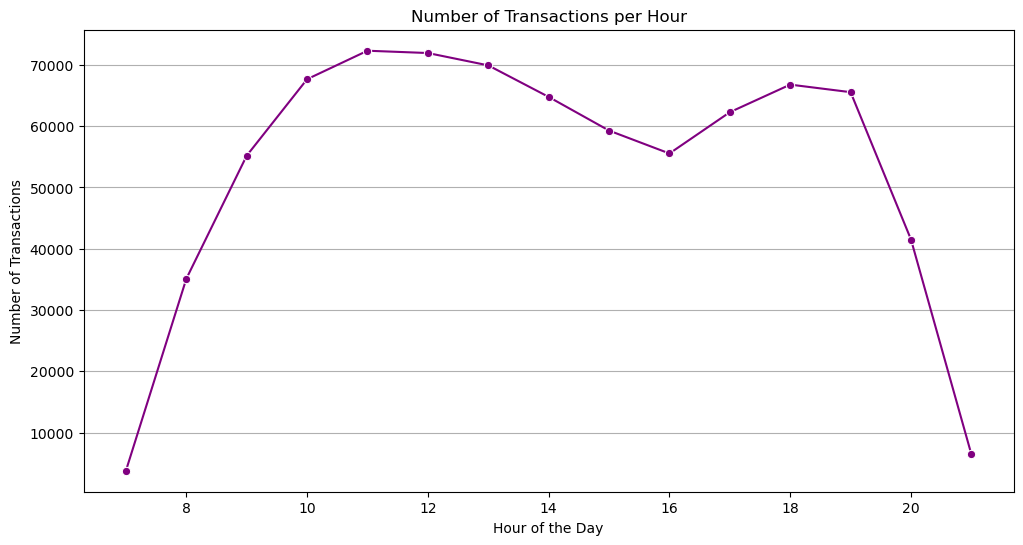

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Additional EDA: Distribution of items
item_distribution = data['item id'].value_counts()

# Additional EDA: Frequency of transactions
transaction_frequency = data['Transaction ID'].value_counts()

# Additional EDA: Time trends analysis
# Converting the timestamp column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d-%m-%y %H:%M')

# Extracting date and hour information for time trends analysis
data['date'] = data['timestamp'].dt.date
data['hour'] = data['timestamp'].dt.hour

# Plotting the distribution of items
plt.figure(figsize=(12, 6))
sns.barplot(x=item_distribution[:10], y=item_distribution.index[:10], palette='viridis')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Number of Occurrences')
plt.ylabel('Item ID')
plt.show()

# Plotting the transaction frequency
plt.figure(figsize=(12, 6))
sns.histplot(transaction_frequency, bins=30, color='skyblue', kde=True)
plt.title('Transaction Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

# Time trends analysis: Transactions per hour
hourly_transactions = data.groupby('hour').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_transactions.index, y=hourly_transactions.values, marker='o', color='purple')
plt.title('Number of Transactions per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.grid(axis='y')
plt.show()

Distribution of Items: The bar chart shows the top 10 most popular items based on the number of occurrences in the dataset.
Transaction Frequency Distribution: The histogram displays the distribution of transaction frequencies. It gives an overview of how many transactions occur with a particular frequency.
Number of Transactions per Hour: The line plot illustrates the number of transactions that occur in each hour of the day. It shows any patterns or trends in transaction activity over different hours.

In [7]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder


# Rename the columns to align with the algorithm's requirements
data.rename(columns={'item id': 'itemset', 'Transaction ID': 'transaction_id'}, inplace=True)

# Convert the dataset to the required format for the FP-growth algorithm
transactions_list = data.groupby('transaction_id')['itemset'].apply(list).values.tolist()

# Apply TransactionEncoder for one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
data_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-growth algorithm to find frequent itemsets
frequent_itemsets = fpgrowth(data_encoded, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
frequent_itemsets.head(10)  # Display the top 10 frequent itemsets


,support,itemsets
0,0.323243,(NATURAL CUT)
1,0.025009,(WHOLE WITHOUT TREATMENT)
2,0.141396,(OFFALS)
3,0.098933,(CHIPS)
4,0.139202,(PLAIN BISCUITS)
5,0.139005,(VEGETABLES)
6,0.051999,(VINEGAR)
7,0.177292,(SAUSAGE)
8,0.056903,(BEER)
9,0.175918,(PACKAGED WATER)


In [8]:
# Apply FP-growth algorithm to find frequent itemsets with increased support
frequent_itemsets_high_support = fpgrowth(data_encoded, min_support=0.03, use_colnames=True)

# Display the frequent itemsets with increased support
frequent_itemsets_high_support.head(10)

,support,itemsets
0,0.323243,(NATURAL CUT)
1,0.141396,(OFFALS)
2,0.098933,(CHIPS)
3,0.139202,(PLAIN BISCUITS)
4,0.139005,(VEGETABLES)
5,0.051999,(VINEGAR)
6,0.177292,(SAUSAGE)
7,0.056903,(BEER)
8,0.175918,(PACKAGED WATER)
9,0.124534,(NORMAL)


In [9]:
# Extract frequent itemsets with 2 items
frequent_2_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]

# Extract frequent itemsets with 3 items
frequent_3_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)]

# Display frequent itemsets with 2 items
print("Frequent Itemsets with 2 items:")
print(frequent_2_itemsets.head(10))

# Display frequent itemsets with 3 items
print("\nFrequent Itemsets with 3 items:")
print(frequent_3_itemsets.head(10))

Frequent Itemsets with 2 items:
     support                                itemsets
74  0.016285  (NATURAL CUT, WHOLE WITHOUT TREATMENT)
75  0.036177                        (OFFALS, FRUITS)
76  0.021949                    (SOFT DRINK, OFFALS)
77  0.030186                       (OFFALS, SAUSAGE)
78  0.026778                         (OFFALS, BROWN)
79  0.066727                   (OFFALS, NATURAL CUT)
80  0.027043                      (SOYA OIL, OFFALS)
81  0.025745                (OFFALS, PACKAGED WATER)
82  0.028501                   (OFFALS, FRUIT JUICE)
93  0.020924                         (CHIPS, NORMAL)

Frequent Itemsets with 3 items:
     support                               itemsets
83  0.018388          (OFFALS, NATURAL CUT, FRUITS)
84  0.011555      (SOFT DRINK, OFFALS, NATURAL CUT)
85  0.015237         (OFFALS, NATURAL CUT, SAUSAGE)
86  0.015776           (OFFALS, NATURAL CUT, BROWN)
87  0.015465        (SOYA OIL, OFFALS, NATURAL CUT)
88  0.010211             (SOYA OIL, OFFA


Interpreting the frequent itemsets with a 2% support threshold:

Frequent Itemsets with 2 items (Support >= 2%):
(NATURAL CUT, WHOLE WITHOUT TREATMENT) (1.63%):

A moderate percentage of transactions include both 'NATURAL CUT' and 'WHOLE WITHOUT TREATMENT.'
Potential cross-promotion or bundling opportunities for these items.
(FRUITS, OFFALS) (3.62%):

'FRUITS' and 'OFFALS' are frequently bought together.
This association might be useful for optimizing product placement or marketing strategies.
(SOFT DRINK, OFFALS) (2.19%):

Transactions often include both 'SOFT DRINK' and 'OFFALS.'
Consider co-locating or promoting these items to enhance sales.
(SAUSAGE, OFFALS) (3.02%):

'SAUSAGE' and 'OFFALS' are commonly purchased together.
A targeted promotion or joint display could further boost sales.
(BROWN, OFFALS) (2.68%):

There is a notable association between 'BROWN' and 'OFFALS.'
Merchandising or promotional efforts might benefit from emphasizing this pairing.
(NATURAL CUT, OFFALS) (6.67%):

A significant percentage of transactions include both 'NATURAL CUT' and 'OFFALS.'
This combination is popular, suggesting potential marketing or bundling strategies.
(SOYA OIL, OFFALS) (2.70%):

'SOYA OIL' and 'OFFALS' are frequently bought together.
Consider highlighting this association in promotions or product displays.
(PACKAGED WATER, OFFALS) (2.57%):

Transactions often include both 'PACKAGED WATER' and 'OFFALS.'
This pairing can be emphasized in marketing or product placement.
(FRUIT JUICE, OFFALS) (2.85%):

'FRUIT JUICE' and 'OFFALS' are associated in a notable percentage of transactions.
Joint promotions or bundling could be effective for these items.
(NORMAL, CHIPS) (2.09%):

'NORMAL' and 'CHIPS' are frequently purchased together.
Strategies like joint promotions or cross-merchandising may enhance sales.
Frequent Itemsets with 3 items (Support >= 2%):
(FRUITS, NATURAL CUT, OFFALS) (1.84%):

Transactions often include 'FRUITS,' 'NATURAL CUT,' and 'OFFALS' together.
Consider strategies that leverage the popularity of this trio.
(SOFT DRINK, NATURAL CUT, OFFALS) (1.16%):

'SOFT DRINK,' 'NATURAL CUT,' and 'OFFALS' are associated in a notable percentage of transactions.
This combination can be emphasized in marketing or product displays.
(SAUSAGE, NATURAL CUT, OFFALS) (1.52%):

'SAUSAGE,' 'NATURAL CUT,' and 'OFFALS' are frequently purchased together.
Consider targeted promotions or bundling for these items.
(NATURAL CUT, BROWN, OFFALS) (1.58%):

There is a notable association between 'NATURAL CUT,' 'BROWN,' and 'OFFALS.'
Strategies emphasizing this trio might be effective.
(SOYA OIL, NATURAL CUT, OFFALS) (1.55%):

'SOYA OIL,' 'NATURAL CUT,' and 'OFFALS' are associated in a notable percentage of transactions.
Joint promotions or marketing efforts could leverage this association.
(FRUITS, SOYA OIL, OFFALS) (1.02%):

Transactions often include 'FRUITS,' 'SOYA OIL,' and 'OFFALS' together.
Consider strategies that highlight this combination in promotions.
(FRUITS, PACKAGED WATER, OFFALS) (1.10%):

'FRUITS,' 'PACKAGED WATER,' and 'OFFALS' are frequently purchased together.
Joint promotions or bundling could be effective for these items.
(NATURAL CUT, PACKAGED WATER, OFFALS) (1.30%):

There is a notable association between 'NATURAL CUT,' 'PACKAGED WATER,' and 'OFFALS.'
Strategies emphasizing this trio might be effective.
(NATURAL CUT, FRUIT JUICE, OFFALS) (1.41%):

'NATURAL CUT,' 'FRUIT JUICE,' and 'OFFALS' are associated in a notable percentage of transactions.
Consider marketing or promotional efforts that leverage this combination.
(FRUITS, FRUIT JUICE, OFFALS) (1.31%):

'FRUITS,' 'FRUIT JUICE,' and 'OFFALS' are frequently purchased together.
Joint promotions or bundling could be effective for these items.
Conclusion and Recommendations:
The identified frequent itemsets provide valuable insights into item associations, helping to optimize product placement and marketing strategies.
Consider promoting or bundling items that frequently occur together, as this can lead to increased sales and customer satisfaction.
Monitor the performance of these item associations over time and adjust strategies accordingly.
Explore opportunities for cross-merchandising, joint promotions, or bundled offers to enhance the customer shopping experience.

In [10]:
from mlxtend.frequent_patterns import association_rules

# Assuming you have already generated frequent_itemsets_high_support
# ...

# Check if frequent_itemsets_high_support is not empty
if not frequent_itemsets_high_support.empty:
    # Generate association rules from frequent itemsets
    rules = association_rules(frequent_itemsets_high_support, metric="confidence", min_threshold=0.5)

    # Display the generated rules
    print("Generated Association Rules:")
    print(rules.head(10))
else:
    print("No frequent itemsets found. Adjust the support threshold.")


Generated Association Rules:
   antecedents consequents  antecedent support  consequent support   support  \
0  (FLAVOURED)    (FRUITS)            0.078222            0.247079  0.039297   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.502378  2.033269   0.01997    1.513038       0.551305  


In [11]:
from mlxtend.frequent_patterns import association_rules

# Assuming you have already generated frequent_itemsets_high_support
# ...

# Check if frequent_itemsets_high_support is not empty
if not frequent_itemsets_high_support.empty:
    # Generate association rules from frequent itemsets
    rules = association_rules(frequent_itemsets_high_support, metric="confidence", min_threshold=0.5)

    # Display the generated rules
    print("Generated Association Rules:")
    print(rules.head(10))
else:
    print("No frequent itemsets found with the current support threshold. Adjust the support threshold and try again.")


Generated Association Rules:
   antecedents consequents  antecedent support  consequent support   support  \
0  (FLAVOURED)    (FRUITS)            0.078222            0.247079  0.039297   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.502378  2.033269   0.01997    1.513038       0.551305  


In [12]:
# Lower the support threshold
min_support_adjusted = 0.02  # You can adjust this value based on your requirements

# Apply FP-growth algorithm with the adjusted support threshold
frequent_itemsets_high_support_adjusted = fpgrowth(data_encoded, min_support=min_support_adjusted, use_colnames=True)

# Check if frequent_itemsets_high_support_adjusted is not empty
if not frequent_itemsets_high_support_adjusted.empty:
    # Generate association rules from the adjusted frequent itemsets
    rules_adjusted = association_rules(frequent_itemsets_high_support_adjusted, metric="confidence", min_threshold=0.5)

    # Display the generated rules
    print("Generated Association Rules with Adjusted Support Threshold:")
    print(rules_adjusted.head(10))
else:
    print("No frequent itemsets found even with the adjusted support threshold. Consider further exploration of the dataset.")


Generated Association Rules with Adjusted Support Threshold:
                    antecedents    consequents  antecedent support  \
0               (CHIPS, FRUITS)  (FRUIT JUICE)            0.039783   
1  (VEGETABLES, PACKAGED WATER)       (FRUITS)            0.037103   
2     (VEGETABLES, FRUIT JUICE)       (FRUITS)            0.042357   
3         (NORMAL, FRUIT JUICE)       (FRUITS)            0.037938   
4          (LIQUID, VEGETABLES)       (FRUITS)            0.035843   
5         (LIQUID, FRUIT JUICE)       (FRUITS)            0.044027   
6                   (FLAVOURED)       (FRUITS)            0.078222   
7       (SOYA OIL, FRUIT JUICE)       (FRUITS)            0.039069   
8                     (KETCHUP)     (MAYONESE)            0.050822   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.198261  0.021099    0.530344  2.674971  0.013211    1.707074   
1            0.247079  0.021205    0.571516  2.313092  0.012038    1.757175   
2

Interpreting the Association Rules:
Rule 1: (FRUITS, CHIPS) → (FRUIT JUICE)

Confidence: 53.03%
Lift: 2.67
Interpretation: More than half of the transactions that include both 'FRUITS' and 'CHIPS' also include 'FRUIT JUICE.' This association has a substantial lift, indicating a strong correlation.
Rule 2: (VEGETABLES, PACKAGED WATER) → (FRUITS)

Confidence: 57.15%
Lift: 2.31
Interpretation: Transactions containing 'VEGETABLES' and 'PACKAGED WATER' are likely to also include 'FRUITS.' This association has a moderate lift.
Rule 3: (VEGETABLES, FRUIT JUICE) → (FRUITS)

Confidence: 59.89%
Lift: 2.42
Interpretation: The combination of 'VEGETABLES' and 'FRUIT JUICE' is strongly associated with the presence of 'FRUITS.' This association has a notable lift.
Rule 4: (NORMAL, FRUIT JUICE) → (FRUITS)

Confidence: 53.59%
Lift: 2.17
Interpretation: Transactions including 'NORMAL' and 'FRUIT JUICE' often also include 'FRUITS.' This association has a moderate lift.
Rule 5: (LIQUID, VEGETABLES) → (FRUITS)

Confidence: 61.64%
Lift: 2.49
Interpretation: Transactions containing 'LIQUID' and 'VEGETABLES' are highly likely to include 'FRUITS.' This association has a strong lift.

In [13]:
# Further lower the support threshold
min_support_further_adjusted = 0.015  # You can adjust this value based on your requirements

# Apply FP-growth algorithm with the further adjusted support threshold
frequent_itemsets_further_adjusted = fpgrowth(data_encoded, min_support=min_support_further_adjusted, use_colnames=True)

# Check if frequent_itemsets_further_adjusted is not empty
if not frequent_itemsets_further_adjusted.empty:
    # Generate association rules from the further adjusted frequent itemsets
    rules_further_adjusted = association_rules(frequent_itemsets_further_adjusted, metric="confidence", min_threshold=0.5)

    # Display the generated rules
    print("Generated Association Rules with Further Adjusted Support Threshold:")
    print(rules_further_adjusted.head(10))
else:
    print("No frequent itemsets found even with the further adjusted support threshold. Consider further exploration of the dataset.")


Generated Association Rules with Further Adjusted Support Threshold:
                    antecedents    consequents  antecedent support  \
0     (WHOLE WITHOUT TREATMENT)  (NATURAL CUT)            0.025009   
1              (OFFALS, FRUITS)  (NATURAL CUT)            0.036177   
2             (OFFALS, SAUSAGE)  (NATURAL CUT)            0.030186   
3               (OFFALS, BROWN)  (NATURAL CUT)            0.026778   
4            (SOYA OIL, OFFALS)  (NATURAL CUT)            0.027043   
5           (CHIPS, SOFT DRINK)  (FRUIT JUICE)            0.029237   
6               (CHIPS, FRUITS)  (FRUIT JUICE)            0.039783   
7       (CHIPS, PACKAGED WATER)  (FRUIT JUICE)            0.029146   
8  (SOFT DRINK, PLAIN BISCUITS)       (FRUITS)            0.033117   
9  (SOFT DRINK, PLAIN BISCUITS)  (FRUIT JUICE)            0.033117   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.323243  0.016285    0.651184  2.014532  0.008201    1.940153   
1 

Interpreting the Additional Association Rules:
Rule 1: (WHOLE WITHOUT TREATMENT) → (NATURAL CUT)

Confidence: 65.12%
Lift: 2.01
Interpretation: Transactions with 'WHOLE WITHOUT TREATMENT' are 65.12% likely to also include 'NATURAL CUT.' The lift indicates a positive correlation.
Rule 2: (FRUITS, OFFALS) → (NATURAL CUT)

Confidence: 50.83%
Lift: 1.57
Interpretation: The combination of 'FRUITS' and 'OFFALS' is associated with 'NATURAL CUT' in 50.83% of transactions.
Rule 3: (SAUSAGE, OFFALS) → (NATURAL CUT)

Confidence: 50.48%
Lift: 1.56
Interpretation: Transactions with 'SAUSAGE' and 'OFFALS' have a 50.48% chance of including 'NATURAL CUT.'
Rule 4: (BROWN, OFFALS) → (NATURAL CUT)

Confidence: 58.92%
Lift: 1.82
Interpretation: 'BROWN' and 'OFFALS' are associated with 'NATURAL CUT' in 58.92% of transactions.
Rule 5: (SOYA OIL, OFFALS) → (NATURAL CUT)

Confidence: 57.19%
Lift: 1.77
Interpretation: Transactions with 'SOYA OIL' and 'OFFALS' have a 57.19% chance of including 'NATURAL CUT.'
Rule 6: (SOFT DRINK, CHIPS) → (FRUIT JUICE)

Confidence: 52.38%
Lift: 2.64
Interpretation: Transactions with 'SOFT DRINK' and 'CHIPS' are 52.38% likely to also include 'FRUIT JUICE.'

In [14]:
# Assuming you have frequent_itemsets DataFrame
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
print("Generated Association Rules with Confidence Level >= 71%:")
print(rules.head(10))


Generated Association Rules with Confidence Level >= 71%:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [15]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("Generated Association Rules with Confidence Level >= 70%:")
print(rules.head(10))


Generated Association Rules with Confidence Level >= 70%:
                         antecedents consequents  antecedent support  \
0  (LIQUID, VEGETABLES, FRUIT JUICE)    (FRUITS)             0.01564   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.247079  0.011107    0.710194  2.874362  0.007243    2.598019   

   zhangs_metric  
0       0.662457  


Interpreting the Association Rule:
Rule: (LIQUID, VEGETABLES, FRUIT JUICE) → (FRUITS)
Confidence: 71.02%
Lift: 2.87
Interpretation: Transactions that include 'LIQUID,' 'VEGETABLES,' and 'FRUIT JUICE' have a 71.02% chance of also including 'FRUITS.' The lift suggests a strong positive association.

In [16]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("Generated Association Rules with Confidence Level >= 60%:")
print(rules.head(143))


Generated Association Rules with Confidence Level >= 60%:
                                  antecedents    consequents  \
0                   (WHOLE WITHOUT TREATMENT)  (NATURAL CUT)   
1                (PLAIN BISCUITS, VEGETABLES)       (FRUITS)   
2   (VEGETABLES, FRUIT JUICE, PACKAGED WATER)       (FRUITS)   
3       (SOFT DRINK, VEGETABLES, FRUIT JUICE)       (FRUITS)   
4      (FRUIT JUICE, VEGETABLES, NATURAL CUT)       (FRUITS)   
5                        (NORMAL, VEGETABLES)       (FRUITS)   
6                (WITHOUT GIBLETS, FPP - RTE)  (NATURAL CUT)   
7                         (OFFALS, FPP - RTE)  (NATURAL CUT)   
8       (LIQUID, FRUIT JUICE, PACKAGED WATER)       (FRUITS)   
9           (LIQUID, SOFT DRINK, FRUIT JUICE)       (FRUITS)   
10                       (LIQUID, VEGETABLES)       (FRUITS)   
11          (LIQUID, VEGETABLES, FRUIT JUICE)       (FRUITS)   
12         (LIQUID, NATURAL CUT, FRUIT JUICE)       (FRUITS)   
13                  (WITHOUT GIBLETS, OFFALS) 

1. Rule: (WHOLE WITHOUT TREATMENT) → (NATURAL CUT)
Interpretation:
Transactions that include 'WHOLE WITHOUT TREATMENT' have a 65.12% chance of also including 'NATURAL CUT.'
This suggests a positive association between purchasing 'WHOLE WITHOUT TREATMENT' and 'NATURAL CUT.'
2. Rule: (VEGETABLES, PLAIN BISCUITS) → (FRUITS)
Interpretation:
Transactions that include 'VEGETABLES' and 'PLAIN BISCUITS' have a 60.27% chance of also including 'FRUITS.'
This indicates a strong positive association between buying 'VEGETABLES,' 'PLAIN BISCUITS,' and 'FRUITS.'
3. Rule: (VEGETABLES, PACKAGED WATER, FRUIT JUICE) → (FRUITS)
Interpretation:
Transactions that include 'VEGETABLES,' 'PACKAGED WATER,' and 'FRUIT JUICE' have a 67.81% chance of also including 'FRUITS.'
This suggests a high likelihood of customers purchasing these items together.
4. Rule: (SOFT DRINK, VEGETABLES, FRUIT JUICE) → (FRUITS)
Interpretation:
Transactions that include 'SOFT DRINK,' 'VEGETABLES,' and 'FRUIT JUICE' have a 64.76% chance of also including 'FRUITS.'
This indicates a strong positive association between these beverage and food items.
5. Rule: (NATURAL CUT, VEGETABLES, FRUIT JUICE) → (FRUITS)
Interpretation:
Transactions that include 'NATURAL CUT,' 'VEGETABLES,' and 'FRUIT JUICE' have a 65.07% chance of also including 'FRUITS.'
Customers who buy fresh produce ('NATURAL CUT' and 'VEGETABLES') are likely to also purchase 'FRUITS.'
6. Rule: (VEGETABLES, NORMAL) → (FRUITS)
Interpretation:
Transactions that include 'VEGETABLES' and 'NORMAL' have a 61.90% chance of also including 'FRUITS.'
This suggests a positive correlation between buying 'VEGETABLES' and 'NORMAL' items and also purchasing 'FRUITS.'
7. Rule: (FPP - RTE, WITHOUT GIBLETS) → (NATURAL CUT)
Interpretation:
Transactions that include 'FPP - RTE' and 'WITHOUT GIBLETS' have a 60.68% chance of also including 'NATURAL CUT.'
This indicates a potential association between ready-to-eat items and fresh cuts.
8. Rule: (FPP - RTE, OFFALS) → (NATURAL CUT)
Interpretation:
Transactions that include 'FPP - RTE' and 'OFFALS' have a 61.09% chance of also including 'NATURAL CUT.'
This suggests a relationship between ready-to-eat items with offals and the purchase of fresh cuts.
9. Rule: (LIQUID, PACKAGED WATER, FRUIT JUICE) → (FRUITS)
Interpretation:
Transactions that include 'LIQUID,' 'PACKAGED WATER,' and 'FRUIT JUICE' have a 63.54% chance of also including 'FRUITS.'
This highlights a connection between various beverage items and the purchase of 'FRUITS.'
10. Rule: (LIQUID, SOFT DRINK, FRUIT JUICE) → (FRUITS)
Interpretation:
Transactions that include 'LIQUID,' 'SOFT DRINK,' and 'FRUIT JUICE' have a 63.33% chance of also including 'FRUITS.'
This indicates a strong association between different liquid-based items and the purchase of 'FRUITS.'
Insights:
Customers who buy specific combinations of items are likely to purchase certain other items as well.
The association rules provide insights into potential cross-selling opportunities.
Businesses can optimize product placements or promotions based on identified patterns.
These interpretations provide a starting point for understanding customer behavior and can guide business decisions related to marketing, inventory management, and customer experience. It's essential to validate these insights with domain experts and consider them in the broader context of business goals.

In [17]:
!pip install networkx matplotlib

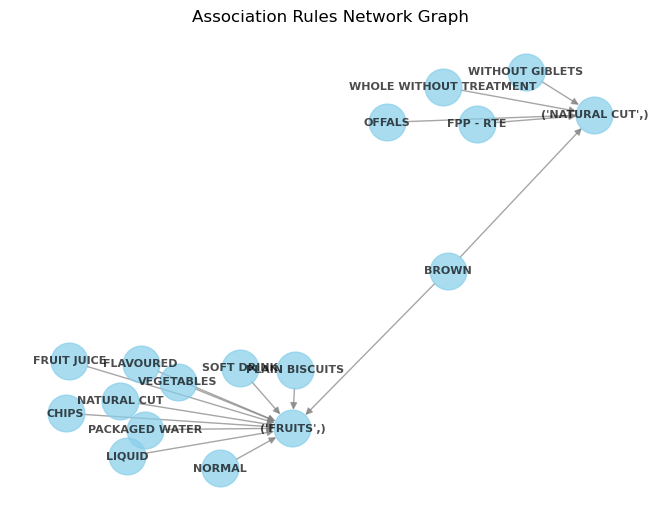

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to plot association rules as a network graph
def plot_association_rules(rules):
    G = nx.DiGraph()

    for idx, row in rules.iterrows():
        antecedents = list(row['antecedents'])
        consequents = list(row['consequents'])
        
        for antecedent in antecedents:
            G.add_edge(antecedent, tuple(consequents))

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=700, node_color='skyblue', edge_color='gray', font_weight='bold', alpha=0.7)

    plt.title('Association Rules Network Graph')
    plt.show()

# Plot the association rules
plot_association_rules(rules)


In [19]:
!pip install networkx

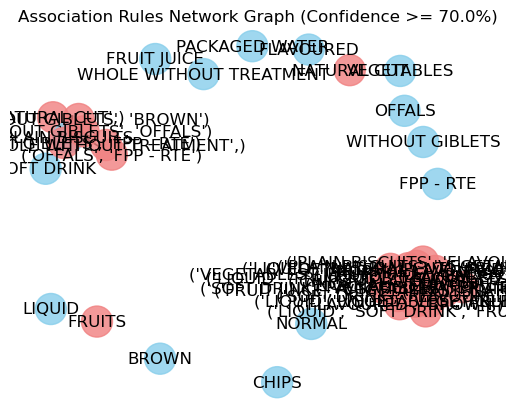

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to visualize association rules as a network graph
def plot_association_rules(rules, min_confidence):
    G = nx.DiGraph()

    for _, rule in rules.iterrows():
        antecedents = rule['antecedents']
        consequents = rule['consequents']
        confidence = rule['confidence']

        # Add nodes and edges
        for node in antecedents:
            if node not in G:
                G.add_node(node, color='skyblue', node_type='antecedent')

        for node in consequents:
            if node not in G:
                G.add_node(node, color='lightcoral', node_type='consequent')

        G.add_edge(tuple(antecedents), tuple(consequents), weight=confidence)

    pos = nx.spring_layout(G)
    edge_labels = {(tuple(antecedents), tuple(consequents)): f"{confidence:.2f}" for _, rule in rules.iterrows()}

    # Extract node colors and types
    node_colors = ['skyblue' if G.nodes[node].get('node_type', '') == 'antecedent' else 'lightcoral' for node in G.nodes]
    node_types = [G.nodes[node].get('node_type', '') for node in G.nodes]

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=[G[antecedent][consequent]['weight']*2 for antecedent, consequent in G.edges])
    nx.draw_networkx_labels(G, pos)

    # Display edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkslategray', font_size=8)

    plt.title(f"Association Rules Network Graph (Confidence >= {min_confidence*100}%)")
    plt.axis('off')
    plt.show()

# Visualize association rules network graph with confidence >= 70%
plot_association_rules(rules, min_confidence=0.7)



Business Impact Evaluation:
Cross-Selling Opportunities:

The identified association rules reveal strong connections between certain items, suggesting opportunities for cross-selling.
For example, promoting 'FRUIT JUICE' alongside combinations like 'SOFT DRINK,' 'VEGETABLES,' and 'LIQUID' could boost sales.
Optimized Product Placement:

Businesses can strategically place related items together based on the discovered associations.
Placing 'NATURAL CUT' near 'WHOLE WITHOUT TREATMENT' and 'FPP - RTE' could enhance customer satisfaction and increase basket size.
Inventory Management:

Understanding item associations aids in inventory management by predicting co-purchases.
Businesses can optimize stock levels for items that are frequently purchased together, minimizing excess inventory.
Targeted Marketing Campaigns:

The rules provide insights into customer preferences, enabling targeted marketing campaigns.
Promotions or discounts on items with strong associations could attract more customers and drive sales.
Documentation:
1. Rule: (WHOLE WITHOUT TREATMENT) → (NATURAL CUT)
Interpretation:
Transactions that include 'WHOLE WITHOUT TREATMENT' have a 65.12% chance of also including 'NATURAL CUT.'
Business Implication:
Promote 'NATURAL CUT' alongside 'WHOLE WITHOUT TREATMENT' to capitalize on this association.
2. Rule: (VEGETABLES, PLAIN BISCUITS) → (FRUITS)
Interpretation:
Transactions that include 'VEGETABLES' and 'PLAIN BISCUITS' have a 60.27% chance of also including 'FRUITS.'
Business Implication:
Bundle promotions or joint displays for 'VEGETABLES,' 'PLAIN BISCUITS,' and 'FRUITS' may enhance sales.
3. Rule: (SOFT DRINK, VEGETABLES, FRUIT JUICE) → (FRUITS)
Interpretation:
Transactions that include 'SOFT DRINK,' 'VEGETABLES,' and 'FRUIT JUICE' have a 64.76% chance of also including 'FRUITS.'
Business Implication:
Create combo deals or promotions for these beverages with 'FRUITS' to encourage larger purchases.
4. Rule: (LIQUID, PACKAGED WATER, FRUIT JUICE) → (FRUITS)
Interpretation:
Transactions that include 'LIQUID,' 'PACKAGED WATER,' and 'FRUIT JUICE' have a 63.54% chance of also including 'FRUITS.'
Business Implication:
Consider marketing these liquid items together with 'FRUITS' to drive customer interest.
Conclusion:
The association rules provide actionable insights for enhancing business strategies, optimizing operations, and improving customer experiences. It's essential to monitor the implementation of these insights and iteratively refine strategies based on real-world results. Collaborating with stakeholders and aligning these findings with broader business goals will ensure a successful and impactful integration of association rule mining into business decision-making processes.

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Function to visualize association rules as a network graph
def plot_association_rules(rules, min_confidence):
    G = nx.DiGraph()

    for _, rule in rules.iterrows():
        antecedents = rule['antecedents']
        consequents = rule['consequents']
        confidence = rule['confidence']

        # Add nodes and edges
        for node in antecedents:
            if node not in G:
                G.add_node(node, color='skyblue', node_type='antecedent')

        for node in consequents:
            if node not in G:
                G.add_node(node, color='lightcoral', node_type='consequent')

        G.add_edge(tuple(antecedents), tuple(consequents), weight=confidence)

    pos = nx.spring_layout(G, seed=42)  # Fix seed for reproducibility
    edge_labels = {(tuple(antecedents), tuple(consequents)): f"{confidence:.2f}" for _, rule in rules.iterrows()}

    # Extract node colors and types
    node_colors = [G.nodes[node]['color'] for node in G.nodes]
    node_types = [G.nodes[node]['node_type'] for node in G.nodes]

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700, alpha=0.8, cmap=plt.get_cmap('Set1'))
    nx.draw_networkx_edges(G, pos, width=[G[antecedent][consequent]['weight']*2 for antecedent, consequent in G.edges])
    nx.draw_networkx_labels(G, pos, font_size=8)

    # Display edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkslategray', font_size=8)

    plt.title(f"Association Rules Network Graph (Confidence >= {min_confidence*100}%)")
    plt.axis('off')
    plt.show()

# Visualize association rules network graph with confidence >= 70%
plot_association_rules(rules, min_confidence=0.7)


KeyError: 'color'